In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.concat(pd.read_excel('DISP.xlsx', sheet_name=None, parse_dates=['Ship Date']), ignore_index=True)

In [3]:
df_clean = df.loc[:, ('Quantity', 'Acquisition Value', 'Ship Date')]
df_clean['Total Value'] = df_clean['Quantity'] * df_clean['Acquisition Value']
df_clean['Year'] = df_clean['Ship Date'].dt.year
df_clean = df_clean.loc[:, ('Year', 'Total Value')]
df_clean = df_clean.sort_values('Year')
yearly_totals = df_clean.groupby('Year').sum()
yearly_totals['Total Value'] = yearly_totals['Total Value'] / 1000000


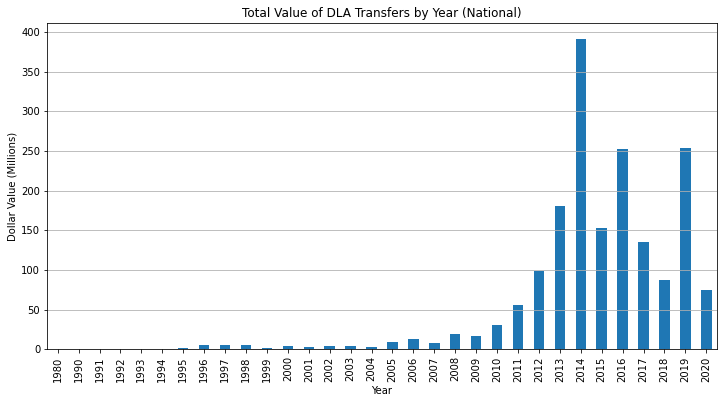

In [7]:
yearly_totals.plot(kind='bar', figsize=(12,6), legend=False)
plt.title('Total Value of DLA Transfers by Year (National)')
plt.ylabel('Dollar Value (Millions)')
plt.xlabel('Year')
plt.grid(axis='y')
plt.savefig('National')

In [5]:
yearly_totals['Total Value'].sum()

1817.3819701800016